In [42]:
import pandas as pd
import numpy as np
import os
os.chdir("D:/New folder")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 

In [43]:
df1=pd.read_csv('loantrain.csv')
 
df1=df1.drop('Loan_ID',axis=1)
df1.head()
 
df1.nunique()
 
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
def adjust(po):
    po.Loan_Status = po.Loan_Status.map({'Y':1,'N':0})
    po.Gender = po.Gender.map({'Male':1,'Female':0})
    
    po.Married = po.Married.map({'Yes':1,'No':0})
    po.Education = po.Education.map({'Graduate':1,'Not Graduate':0})
    po.Self_Employed = po.Self_Employed.map({'Yes':1,'No':0})
    po.Property_Area = po.Property_Area.map({'Urban':1,'Rural':0,'SemiUrban':2})
    po.Dependents = po.Dependents.map({'3+':3,'1':1,'2':2,'0':0})
    
 
adjust(df1)
#
df1.dtypes

Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int64
dtype: object

In [45]:
df1.isnull().sum()
#df1=df1.apply(lambda x:x.fillna('ffill'))
#df1.isnull().sum()
#df1.dtypes
cols = ['LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Gender','Married','Dependents','Self_Employed']
df1['LoanAmount'].fillna(method='ffill',inplace=True)
df1['LoanAmount'].fillna(method='bfill',inplace=True)
df1['Loan_Amount_Term'].fillna(method='ffill',inplace=True)
df1['Credit_History'].fillna(method='ffill',inplace=True)
df1['Property_Area'].fillna(method='ffill',inplace=True)
df1['Gender'].fillna(method='ffill',inplace=True)
df1['Married'].fillna(method='ffill',inplace=True)
df1['Dependents'].fillna(method='ffill',inplace=True)
df1['Self_Employed'].fillna(method='ffill',inplace=True)
df1.isnull().sum()
df1.dtypes

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area        233
Loan_Status            0
dtype: int64

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int64
dtype: object

<Figure size 720x720 with 0 Axes>

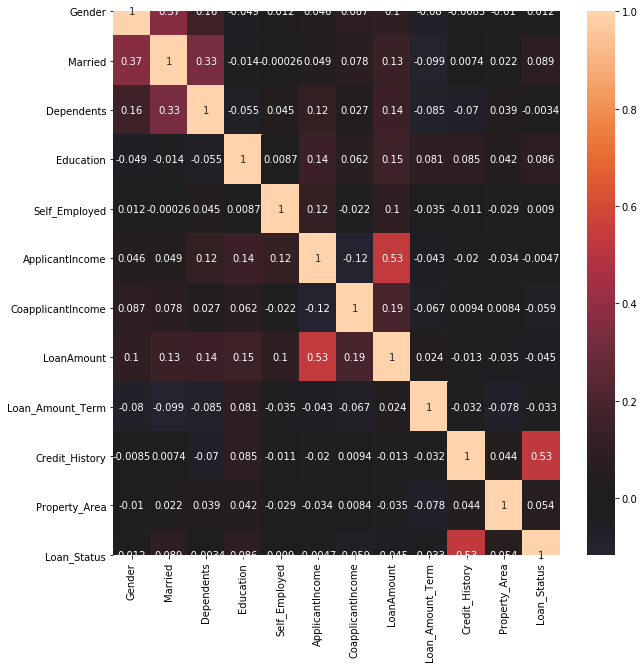

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,center=0)

In [48]:
if 'Loan_Status'in df1.columns:
    target = df1.Loan_Status
    df1=df1.drop('Loan_Status',axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(df1,target,test_size=.3)

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)